In [1]:
import numpy as np   
from sklearn.linear_model import LogisticRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [2]:
df = pd.read_excel("ECAP Dataset.xlsx")  
df.shape

(154, 12)

In [3]:
df.dtypes

Corner Angle            int64
Temperature             int64
Speed                 float64
Friction Factor       float64
Temp of die             int64
Material               object
Initial Density       float64
Back Pressure           int64
Max Load              float64
Final Volume          float64
Final Density         float64
Density Percentage    float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Corner Angle        154 non-null    int64  
 1   Temperature         154 non-null    int64  
 2   Speed               154 non-null    float64
 3   Friction Factor     154 non-null    float64
 4   Temp of die         154 non-null    int64  
 5   Material            154 non-null    object 
 6   Initial Density     154 non-null    float64
 7   Back Pressure       154 non-null    int64  
 8   Max Load            154 non-null    float64
 9   Final Volume        154 non-null    float64
 10  Final Density       154 non-null    float64
 11  Density Percentage  154 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 14.6+ KB


In [5]:
df.head(15)

,Corner Angle,Temperature,Speed,Friction Factor,Temp of die,Material,Initial Density,Back Pressure,Max Load,Final Volume,Final Density,Density Percentage
0,10,300,1.0,0.05,20,TI-10V-2Fe-3Al,0.5,200,22381.20,3217.2600,0.783275,78.327521
1,30,150,0.5,0.05,200,TI-10V-2Fe-3Al,0.8,200,109092.60,3698.1003,1.090290,109.028952
2,40,300,1.0,0.05,20,TI-10V-2Fe-3Al,0.5,200,24382.80,3181.5900,0.792057,79.205680
3,0,300,1.0,0.01,20,TI-10V-2Fe-3Al,0.5,200,31172.40,2819.6700,0.893722,89.372161
4,0,300,1.0,0.10,20,TI-10V-2Fe-3Al,0.5,200,90846.00,2304.6300,1.093451,109.345101
5,60,100,2.0,0.05,200,TI-13C11Cr3Al,0.8,200,85752.84,3731.0646,1.080657,108.065671
6,0,300,2.0,0.05,20,TI-10V-2Fe-3Al,0.5,200,89893.20,2322.0300,1.085257,108.525730
7,20,300,1.0,0.07,20,TI-10V-2Fe-3Al,0.5,200,44000.40,2775.3000,0.908010,90.800994
8,80,250,1.0,0.05,50,TI-13C11Cr3Al,0.5,200,23928.00,3188.5500,0.790328,79.032789
9,0,200,1.0,0.05,20,TI-10V-2Fe-3Al,0.5,200,101228.40,2335.9500,1.078790,107.879021


In [6]:
df.describe(include='all')

,Corner Angle,Temperature,Speed,Friction Factor,Temp of die,Material,Initial Density,Back Pressure,Max Load,Final Volume,Final Density,Density Percentage
count,154.000000,154.000000,154.000000,154.000000,154.000000,154,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,TI-10V-2Fe-3Al,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,93,NaN,NaN,NaN,NaN,NaN,NaN
mean,39.350649,293.116883,1.122078,0.043247,147.532468,NaN,0.620779,96.103896,56389.804442,3398.704736,0.920729,92.072928
std,30.312648,152.527805,0.638447,0.017818,166.140588,NaN,0.134638,69.670670,32898.220035,535.361519,0.122979,12.297873
min,0.000000,30.000000,0.200000,0.010000,20.000000,NaN,0.500000,0.000000,9885.620000,2304.630000,0.676510,67.651007
25%,10.000000,200.000000,0.500000,0.030000,20.000000,NaN,0.500000,12.500000,28823.401750,3086.471250,0.806426,80.642633
50%,40.000000,300.000000,1.000000,0.050000,60.000000,NaN,0.600000,100.000000,49896.545000,3404.609500,0.927336,92.733597
75%,70.000000,400.000000,1.000000,0.050000,200.000000,NaN,0.700000,150.000000,83671.556250,3832.674000,1.033500,103.350016


In [7]:
mat=pd.get_dummies(df['Material'])
mat.head()

,TI-10V-2Fe-3Al,TI-13C11Cr3Al
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [8]:
display(df.dtypes)

Corner Angle            int64
Temperature             int64
Speed                 float64
Friction Factor       float64
Temp of die             int64
Material               object
Initial Density       float64
Back Pressure           int64
Max Load              float64
Final Volume          float64
Final Density         float64
Density Percentage    float64
dtype: object

In [9]:
df['Final Density'] = df['Final Density'].astype(int)

In [10]:
df=pd.concat([df,mat],axis=1)
df.head(15)

,Corner Angle,Temperature,Speed,Friction Factor,Temp of die,Material,Initial Density,Back Pressure,Max Load,Final Volume,Final Density,Density Percentage,TI-10V-2Fe-3Al,TI-13C11Cr3Al
0,10,300,1.0,0.05,20,TI-10V-2Fe-3Al,0.5,200,22381.20,3217.2600,0,78.327521,1,0
1,30,150,0.5,0.05,200,TI-10V-2Fe-3Al,0.8,200,109092.60,3698.1003,1,109.028952,1,0
2,40,300,1.0,0.05,20,TI-10V-2Fe-3Al,0.5,200,24382.80,3181.5900,0,79.205680,1,0
3,0,300,1.0,0.01,20,TI-10V-2Fe-3Al,0.5,200,31172.40,2819.6700,0,89.372161,1,0
4,0,300,1.0,0.10,20,TI-10V-2Fe-3Al,0.5,200,90846.00,2304.6300,1,109.345101,1,0
5,60,100,2.0,0.05,200,TI-13C11Cr3Al,0.8,200,85752.84,3731.0646,1,108.065671,0,1
6,0,300,2.0,0.05,20,TI-10V-2Fe-3Al,0.5,200,89893.20,2322.0300,1,108.525730,1,0
7,20,300,1.0,0.07,20,TI-10V-2Fe-3Al,0.5,200,44000.40,2775.3000,0,90.800994,1,0
8,80,250,1.0,0.05,50,TI-13C11Cr3Al,0.5,200,23928.00,3188.5500,0,79.032789,0,1
9,0,200,1.0,0.05,20,TI-10V-2Fe-3Al,0.5,200,101228.40,2335.9500,1,107.879021,1,0


In [11]:
df.drop(["Material","Density Percentage","Max Load","Final Volume"],axis=1,inplace=True)
df.head()

,Corner Angle,Temperature,Speed,Friction Factor,Temp of die,Initial Density,Back Pressure,Final Density,TI-10V-2Fe-3Al,TI-13C11Cr3Al
0,10,300,1.0,0.05,20,0.5,200,0,1,0
1,30,150,0.5,0.05,200,0.8,200,1,1,0
2,40,300,1.0,0.05,20,0.5,200,0,1,0
3,0,300,1.0,0.01,20,0.5,200,0,1,0
4,0,300,1.0,0.10,20,0.5,200,1,1,0


In [12]:
corr=df.corr()
corr

,Corner Angle,Temperature,Speed,Friction Factor,Temp of die,Initial Density,Back Pressure,Final Density,TI-10V-2Fe-3Al,TI-13C11Cr3Al
Corner Angle,1.000000,0.054865,0.093282,-0.039634,-0.257675,-0.007883,0.004984,-0.403137,-0.215147,0.215147
Temperature,0.054865,1.000000,-0.039237,-0.081185,-0.058320,-0.227234,-0.163375,-0.187156,0.327496,-0.327496
Speed,0.093282,-0.039237,1.000000,0.016639,0.165900,0.112483,-0.097971,0.049353,-0.078305,0.078305
Friction Factor,-0.039634,-0.081185,0.016639,1.000000,0.009347,-0.140006,0.120819,0.066429,-0.016407,0.016407
Temp of die,-0.257675,-0.058320,0.165900,0.009347,1.000000,0.367543,-0.010153,0.281777,-0.222123,0.222123
Initial Density,-0.007883,-0.227234,0.112483,-0.140006,0.367543,1.000000,0.008687,0.491258,-0.141718,0.141718
Back Pressure,0.004984,-0.163375,-0.097971,0.120819,-0.010153,0.008687,1.000000,0.441512,-0.035879,0.035879
Final Density,-0.403137,-0.187156,0.049353,0.066429,0.281777,0.491258,0.441512,1.000000,-0.085621,0.085621
TI-10V-2Fe-3Al,-0.215147,0.327496,-0.078305,-0.016407,-0.222123,-0.141718,-0.035879,-0.085621,1.000000,-1.000000
TI-13C11Cr3Al,0.215147,-0.327496,0.078305,0.016407,0.222123,0.141718,0.035879,0.085621,-1.000000,1.000000


In [13]:
X=df.drop("Final Density",axis=1)
Y=df["Final Density"]

In [14]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=25)

## Logistic Regression

In [15]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

In [16]:
# Fit the model on train
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [17]:
Y_predict = model.predict(X_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3        4         5         6  \
0 -0.064867 -0.003576  0.484029 -0.079609  0.00247  1.595798  0.019325   

          7         8  intercept  
0 -1.162922  0.129779  -1.033143  


In [18]:
model_score = model.score(X_train, Y_train)
print(model_score)

0.8691588785046729


In [19]:
model_score = model.score(X_test, Y_test)
print(model_score)

0.8297872340425532


<AxesSubplot:>

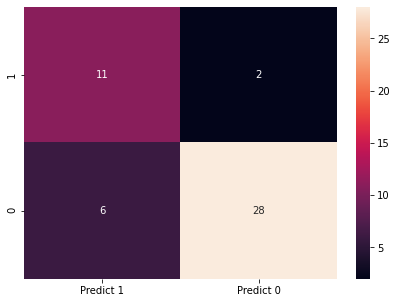

In [20]:
cm=metrics.confusion_matrix(Y_test, Y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [21]:
predictions=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.8297872340425532

In [22]:
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        34
           1       0.65      0.85      0.73        13

    accuracy                           0.83        47
   macro avg       0.79      0.83      0.80        47
weighted avg       0.85      0.83      0.84        47



## Gaussian NB

In [23]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [24]:
model_predict=model.predict(X_train)
predictions=model.predict(X_test)

In [25]:
accuracy_score(Y_test,predictions)

0.8085106382978723

In [26]:
print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))

0.8411214953271028
0.8085106382978723


## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [28]:
XScaled = X.apply(zscore)
XScaled.describe()

,Corner Angle,Temperature,Speed,Friction Factor,Temp of die,Initial Density,Back Pressure,TI-10V-2Fe-3Al,TI-13C11Cr3Al
count,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02
mean,7.137148e-17,1.441848e-18,-2.162772e-16,-7.137148e-17,-9.372013e-17,1.845566e-16,3.820897e-16,4.037175e-17,-1.066968e-16
std,1.003263e+00,1.003263e+00,1.003263e+00,1.003263e+00,1.003263e+00,1.003263e+00,1.003263e+00,1.003263e+00,1.003263e+00
min,-1.302395e+00,-1.730670e+00,-1.448965e+00,-1.871957e+00,-7.701222e-01,-8.999906e-01,-1.383903e+00,-1.234743e+00,-8.098852e-01
25%,-9.714232e-01,-6.124830e-01,-9.775408e-01,-7.458580e-01,-7.701222e-01,-8.999906e-01,-1.203902e+00,-1.234743e+00,-8.098852e-01
50%,2.149166e-02,4.527420e-02,-1.918347e-01,3.802413e-01,-5.285768e-01,-1.548371e-01,5.610418e-02,8.098852e-01,-8.098852e-01
75%,1.014407e+00,7.030314e-01,-1.918347e-01,3.802413e-01,3.168324e-01,5.903164e-01,7.761078e-01,8.098852e-01,1.234743e+00
max,1.676350e+00,2.018546e+00,2.950990e+00,3.195490e+00,2.430355e+00,2.080624e+00,1.496111e+00,8.098852e-01,1.234743e+00


In [29]:
NNH = KNeighborsClassifier(n_neighbors = 19, weights='distance')

In [30]:
NNH.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=19, weights='distance')

In [31]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test,Y_test)

0.7659574468085106

In [32]:
print(NNH.score(X_train,Y_train))
print(NNH.score(X_test,Y_test))

0.9813084112149533
0.7659574468085106


#### Model is over fitting

## SVM

In [33]:
from sklearn import svm

In [34]:
from sklearn.svm import SVC

In [35]:
reg = svm.SVR(kernel='linear',gamma='auto', C=1)
reg.fit(X_train,Y_train)

SVR(C=1, gamma='auto', kernel='linear')

In [36]:
reg.score(X_train, Y_train) 

0.657085638055656

In [37]:
reg.score(X_test, Y_test)

0.4382708227970017

#### RBF is highly over fitting and linear is also over fitting

## Bagging

In [38]:
from sklearn.ensemble import BaggingClassifier

In [51]:
bgr= BaggingClassifier (n_estimators=9,random_state=25)
bgr=bgr.fit(X_train,Y_train)
print(bgr.score(X_train,Y_train))
print(bgr.score(X_test,Y_test))
bgr_tr=bgr.score(X_train,Y_train)
bgr_ts=bgr.score(X_test,Y_test)

0.9813084112149533
0.8936170212765957


## AdaBoost

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
adr= AdaBoostClassifier (n_estimators=10,random_state=25)
adr=adr.fit(X_train,Y_train)
print(adr.score(X_train,Y_train))
print(adr.score(X_test,Y_test))
adr_tr=adr.score(X_train,Y_train)
adr_ts=adr.score(X_test,Y_test)

0.9532710280373832
0.9361702127659575


#### Best Model

## GradientBoosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
gbr= GradientBoostingClassifier (n_estimators=10,random_state=25)
gbr=gbr.fit(X_train,Y_train)
print(gbr.score(X_train,Y_train))
print(gbr.score(X_test,Y_test))
gbr_tr=gbr.score(X_train,Y_train)
gbr_ts=gbr.score(X_test,Y_test)

0.9626168224299065
0.9148936170212766


## Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dTree= DecisionTreeClassifier(criterion='gini',splitter='best',random_state=25,max_depth=5)
dTree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, random_state=25)

In [54]:
print(dTree.score(X_train,Y_train)) 
print(dTree.score(X_test,Y_test))
dTree_tr=dTree.score(X_train,Y_train)
dTree_ts=dTree.score(X_test,Y_test)

0.9813084112149533
0.9361702127659575


## RandomForest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfr= RandomForestClassifier (n_estimators=10,random_state=25,max_features=5)
rfr=rfr.fit(X_train,Y_train)

In [49]:
print(rfr.score(X_train,Y_train))
print(rfr.score(X_test,Y_test))
rfr_tr=rfr.score(X_train,Y_train)
rfr_ts=rfr.score(X_test,Y_test)

0.9813084112149533
0.8723404255319149


## Comparison of models

In [59]:
score_res = pd.DataFrame({'Model':['Bagging','AdaBoost','GradientBoosting','Decision Tree','RandomForest'],
                          'Train Score':[bgr_tr, adr_tr, gbr_tr,dTree_tr,rfr_tr],
                         'Test Score':[bgr_ts, adr_ts, gbr_ts,dTree_ts,rfr_ts]
                         })
score_res

,Model,Train Score,Test Score
0,Bagging,0.981308,0.893617
1,AdaBoost,0.953271,0.936170
2,GradientBoosting,0.962617,0.914894
3,Decision Tree,0.981308,0.936170
4,RandomForest,0.981308,0.872340


In [ ]:
# Adaboost is the best